loading the libraries to be used

In [8]:
import re    # for regular expressions
import nltk  # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
import pandas as pd

train  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_E6oV3lV.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_tweets_anuFYb8.csv')

print(train[train['label'] == 0].head())
print('--------------------------------------')
print(train[train['label'] == 1].head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
--------------------------------------
    id  label                                              tweet
13  14      1  @user #cnn calls #michigan middle school 'buil...
14  15      1  no comment!  in #australia   #opkillingbay #se...
17  18      1                             retweet if you agree! 
23  24      1    @user @user lumpy says i am a . prove it lumpy.
34  35      1  it's unbelievable that in the 21st century we'...


**Data Inspection**

1----> hate speech
0---->normal speech

In [7]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
train[train['label'] == 1].head(10)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


dimensions of the train and test dataset.

In [10]:
train.shape, test.shape


((31962, 3), (17197, 2))

distribution of length of the tweets, in terms of words, in both train and test data.

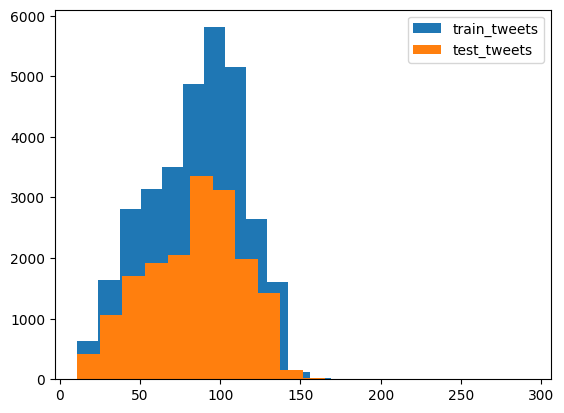

In [11]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [34]:
combine = train.append(test, ignore_index=True)
combine.shape


<ipython-input-34-dd44bcece7d9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test, ignore_index=True)


(49159, 3)

removing unwanted text patterns from the tweets.

In [37]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Removing Twitter **Handles**

In [38]:
combine['clean_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[w]*")
combine.head()

,id,label,tweet,tidy_tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation


# Removing Punctuations, Numbers, and Special **Characters**

In [39]:
combine['clean_tweet'] = combine['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

<ipython-input-39-ad54e60faf5c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['clean_tweet'] = combine['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,user camping tomorrow user user user user user user user dannyâ¦,user camping tomorrow user user user user user user user danny
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,user user welcome here ! i'm it's so #gr8 !,user user welcome here i m it s so #gr


# Removing Short **Words**

In [40]:
combine['clean_tweet'] = combine['clean_tweet'].apply(lambda x: ' '.join([w  for w in x.split() if len(w)>3]))

In [41]:
combine.head()

,id,label,tweet,tidy_tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when father dysfunctional selfish drags kids into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society #motivation


# **Text Normalization**

In [42]:
token_tweet = combine['clean_tweet'].apply(lambda x: x.split()) # tokenizing
token_tweet.head()

0                      [user, when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [user, user, thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                 [bihday, your, majesty]
3                                                                        [#model, love, take, with, time]
4                                                                      [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [43]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
token_tweet = token_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [44]:
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])
combine['clean_tweet'] = token_tweet

# **Extracting Features from Cleaned Tweets**

Bag-of-words Features

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [46]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['clean_tweet'])
bow.shape

(49159, 1000)

# Model Building

Logistic Regression(sklearn)

In [47]:
 from sklearn.linear_model import LogisticRegression
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import f1_score
 from sklearn.metrics import accuracy_score

In [48]:
# Extracting train and test BoW features
train_bow = bow[:31962,:]; test_bow = bow[31962:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],
                                            random_state=42,test_size=0.3)

In [49]:
lreg = LogisticRegression()
# training the model
lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
accuracy=accuracy_score(yvalid, prediction_int)
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5398671096345515

In [50]:


print("Accuracy:", accuracy)


Accuracy: 0.9422254666805715


In [51]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)